In [1]:
import pandas as pds
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
filePath = 'train.csv'

In [3]:
trainSet = pds.read_csv(filePath, sep=',')
print(trainSet.shape)

(1306122, 3)


In [4]:
trainSet.loc[:]

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [5]:
insincereQuestions = trainSet.loc[trainSet['target']==1]
insincereQuestions.loc[:]

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1
119,00056d45a1ce63856fc6,Why do females find penises ugly?,1
127,0005de07b07a17046e27,How do I marry an American woman for a Green C...,1
144,00068875d7c82a5bcf88,Why do Europeans say they're the superior race...,1
156,0006ffd99a6599ff35b3,Did Julius Caesar bring a tyrannosaurus rex on...,1
167,00075f7061837807c69f,In what manner has Republican backing of 'stat...,1


In [6]:
sincereQuestions = trainSet.loc[trainSet['target']==0]
sincereQuestions.loc[:]

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


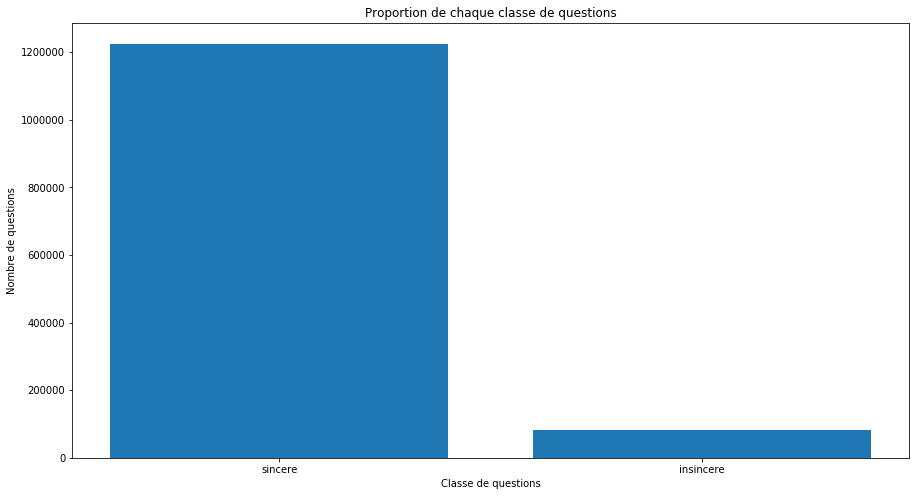

In [7]:
plt.figure(figsize=(15, 8))
plt.bar(["sincere", "insincere"], [len(sincereQuestions), len(insincereQuestions)])
plt.title("Proportion de chaque classe de questions")
plt.xlabel("Classe de questions")
plt.ylabel("Nombre de questions")
plt.savefig("Proportion de chaque classe de questions.png")
plt.show()

In [8]:
questDict = {}
count = 1

for i in insincereQuestions.index :
    questDict['Question ' + str(count)] = nltk.Text(insincereQuestions['question_text'][i])
    count += 1

In [9]:
def sort_by_tfidf(words, document, documents) :
    
    l = []
    for word in words :
        l.append((word[0], documents.tf_idf(word[0], document)))
    
    l = sorted(l, key=lambda d: d[1], reverse=True)
    
    return l

In [10]:
listQuest = []

for value in questDict.values() :
    listQuest.append(value)

In [11]:
documents = nltk.TextCollection(listQuest)

In [12]:
questDict = {}
count = 1

for i in insincereQuestions.index :
    questDict['Question ' + str(count)] = insincereQuestions['question_text'][i]
    count += 1

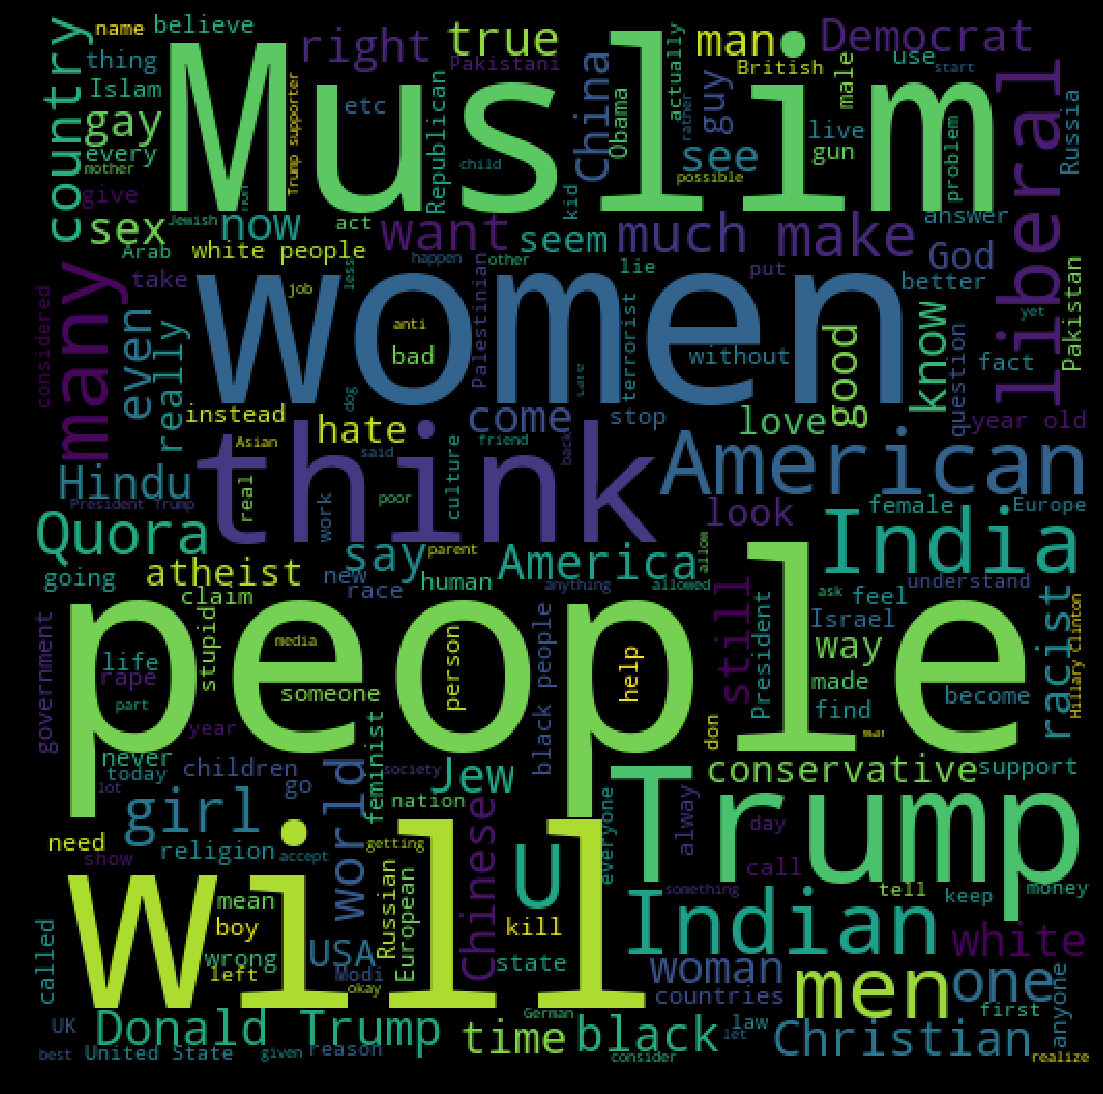

In [13]:
spam_words = ' '.join(list(insincereQuestions['question_text']))
words_cloud = WordCloud(width=512, height=512).generate(spam_words)

plt.figure(figsize=(25, 15), facecolor='k')
plt.imshow(words_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("WordCloud des mots issus des question dites non-sincères.png")
plt.show()

In [14]:
words = []

for value in questDict.values() :
    spliter = value.split()
    for i in spliter :
        words.append(i.lower())

In [15]:
with open('words.txt', 'w', encoding='utf-8') as filehandle :
    filehandle.writelines('%s\n' % word for word in words)
filehandle.close()

In [16]:
listWords = []

for i in range(38) :
    words = []
    with open('part-' + str(i) + '.txt', encoding='utf-8') as file :
        words = file.read()
    file.close()

    words = words.split('\n')

    listW = []
    for word in words :
        listW.append(re.findall("[a-z0-9_-]+", word))

    del listW[-1]

    for l in listW :
        if len(l) == 2 :
            listWords.append((l[0], int(l[1])))
        if len(l) == 3 :
            listWords.append((l[0] + "'" + l[1], int(l[2])))

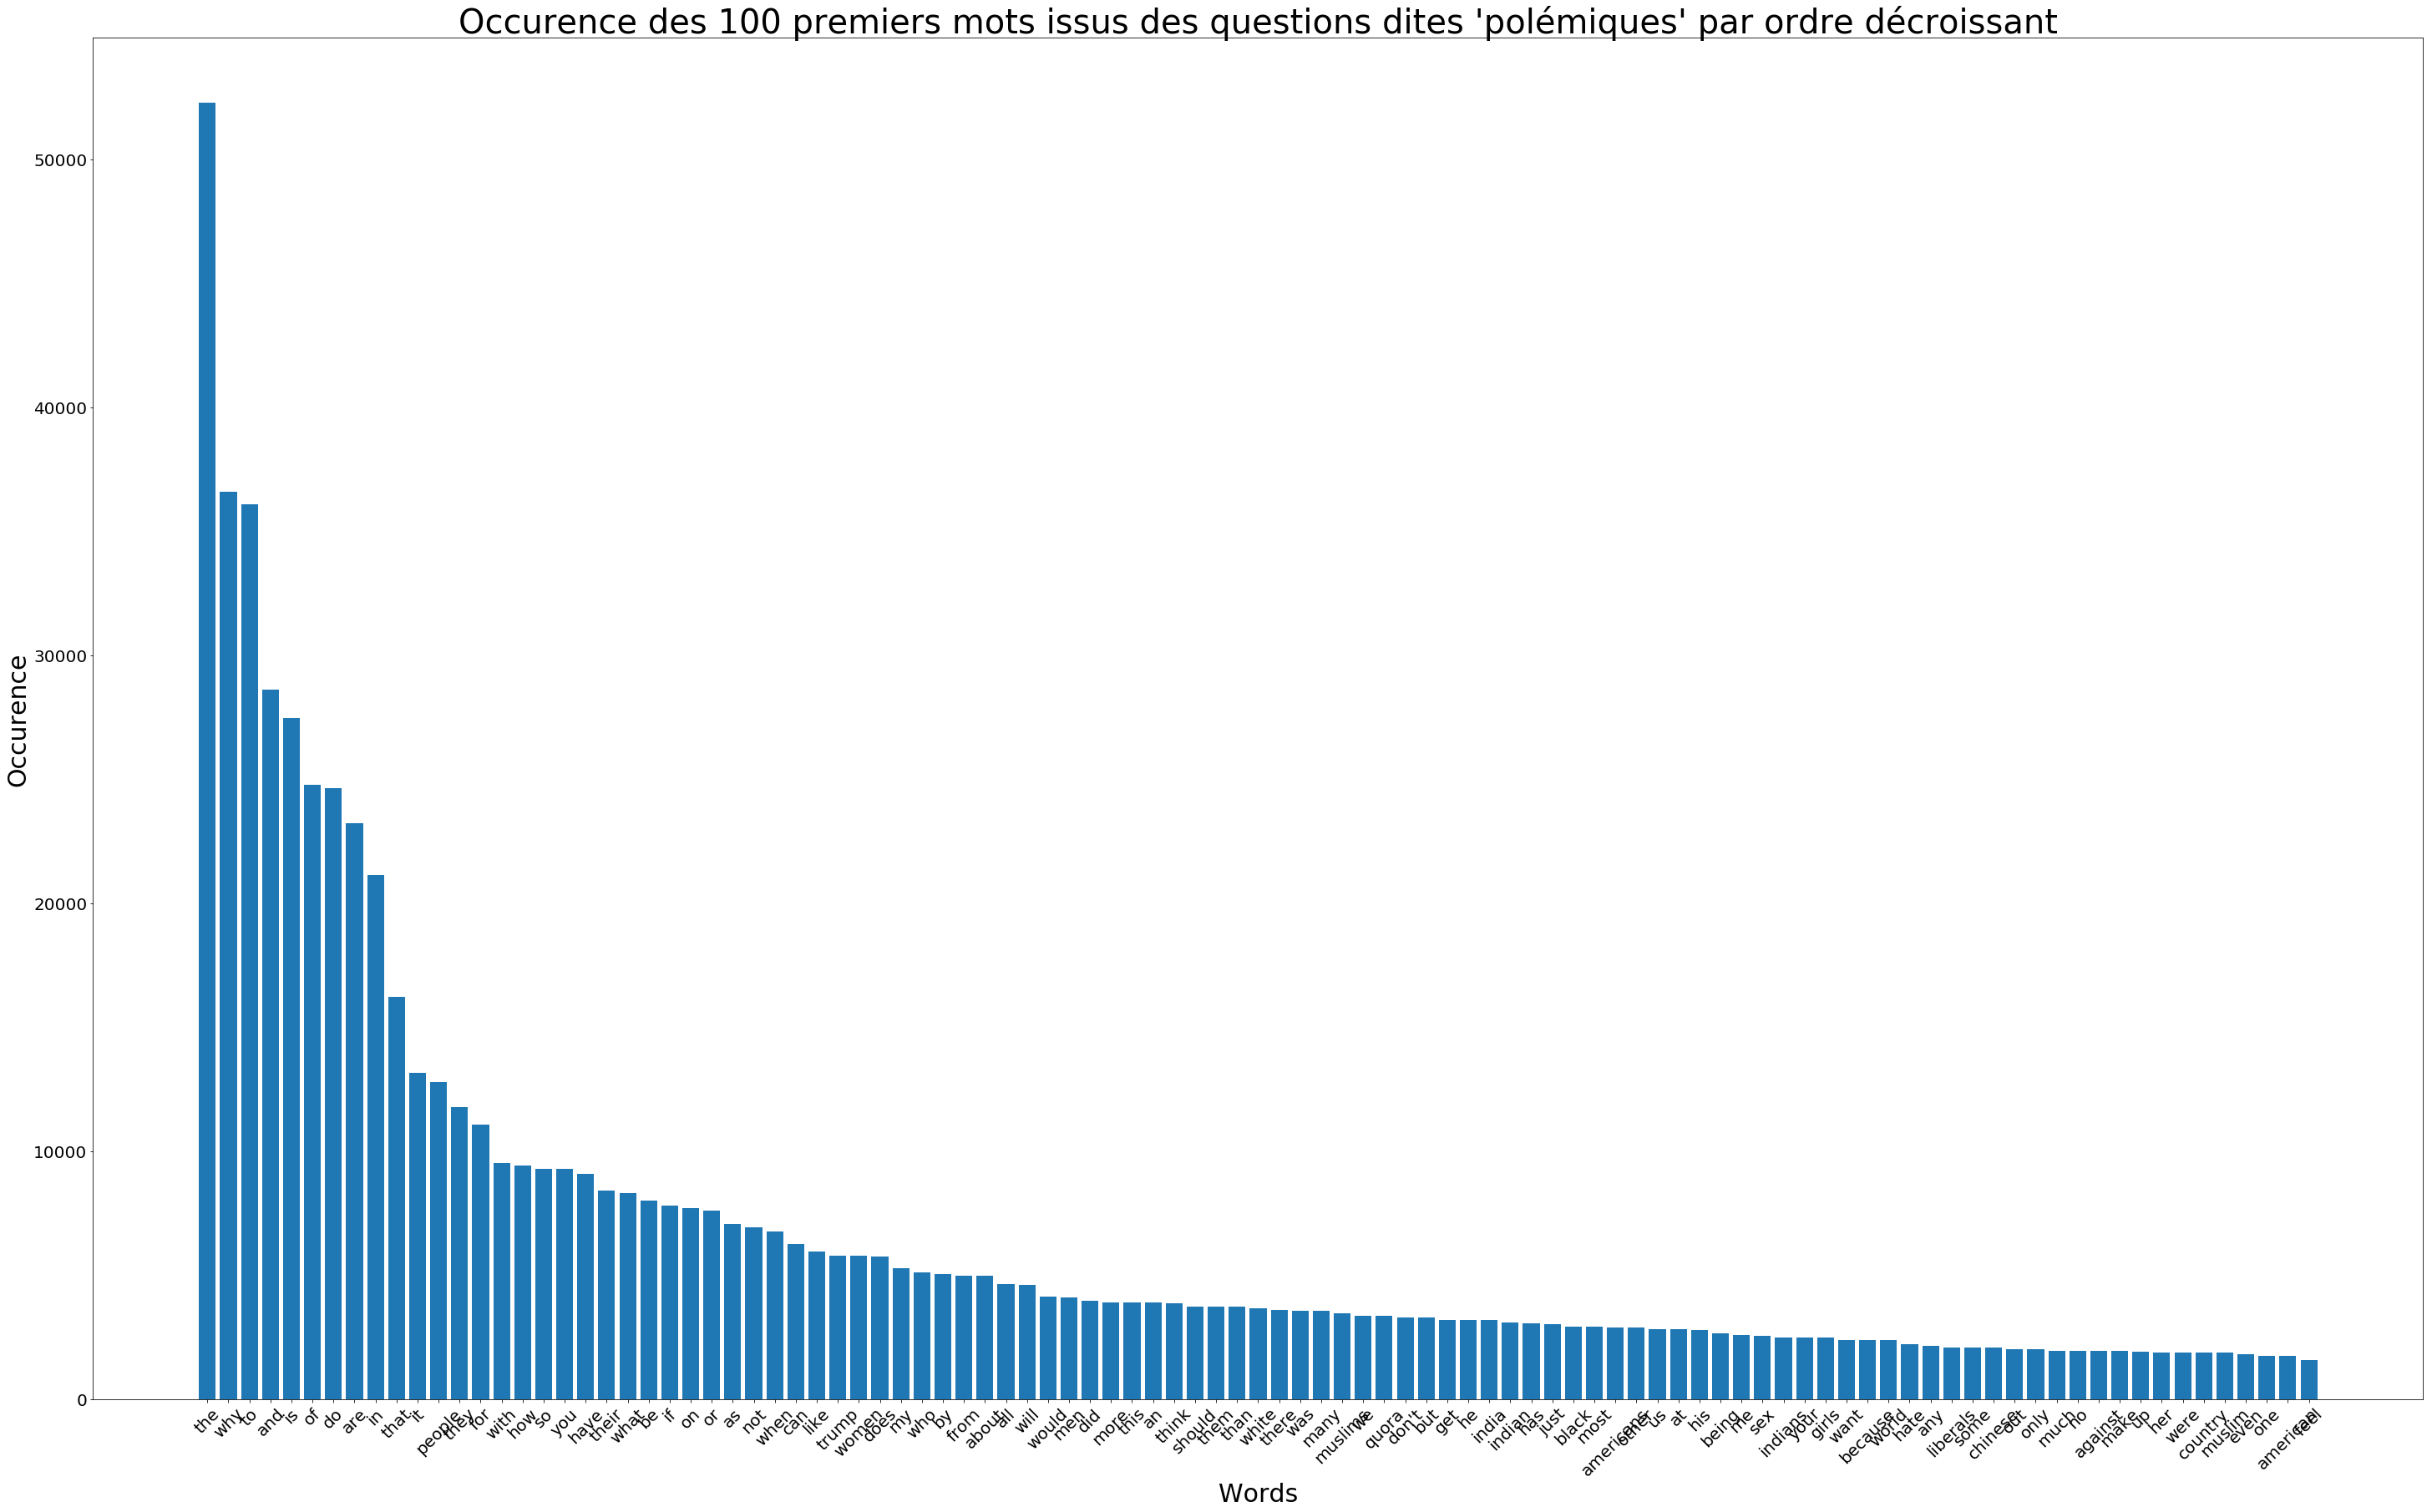

In [23]:
X = []
Y = []

"""for l in listWords :
    X.append(l[0])
    Y.append(int(l[1]))"""

for i in range(101) :
    X.append(listWords[i][0])
    Y.append(listWords[i][1])

plt.figure(figsize=(50, 30))
plt.bar(X, Y)
plt.title("Occurence des 100 premiers mots issus des questions dites 'polémiques' par ordre décroissant", fontsize=40)
plt.xlabel("Words", fontsize=30)
plt.xticks(rotation=45, fontsize=20)
plt.ylabel("Occurence", fontsize=30)
plt.yticks(fontsize=20)
plt.savefig("Occurence des 100 premiers mots par ordre décroissant.png")
plt.show()

In [18]:
listWordTfidf = []
"""for document in listQuest :
    listWordTfidf.append(sort_by_tfidf(listWords, document=document, documents=documents))"""
#from pyspark.sql import SparkSession
mot = "ba"
text1 = """Alban : Salut Henry ! Tu t'en sors en Big Data ? \nHenry : Salut Alban ! \
                                             Mais bien sûr :-) Je suis un génie de Daoukro."""
texte1 = nltk.Text(text1)
import nltk.corpus
corpus = nltk.corpus.stopwords
texte2 = nltk.Text("Albeiro : Salut Alban ! Tu t'en sors en Big Data ? \nAlban : Salut Albeiro ! \
                                             Mais bien sûr :-) Je suis un génie de Gagnoa.")
texte3 = nltk.Text("Henry : Salut Albeiro ! Tu t'en sors en BI ? \nAlbeiro : Salut Henry ! \
                                             Ca se passe plus ou moins bien :-) Je suis un génie de Medeline.")

textes = nltk.TextCollection([texte1, texte2, texte3])
idf = textes.idf(mot)
count = texte1.count(mot)
tf = textes.tf(mot, texte1)
result = documents.tf_idf(mot, texte1)
#print(mot, "\n", texte1, "\n", result)
print(corpus)

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>


In [19]:
#spark = SparkSession.builder.getOrCreate()

In [20]:
"""import csv

with open('listWords.csv', 'w', encoding='utf-8', newline='') as csvfile :
    writter = csv.writer(csvfile, delimiter=',')
    writter.writerow(('Word', 'Occurrence'))
    for word in listWords :
        writter.writerow((word[0], word[1]))
csvfile.close()

with open("listWords.txt", 'w', encoding='utf-8') as file :
    file.writelines("(%s, %d)\n" % (word[0], word[1]) for word in listWords)
file.close"""

'import csv\n\nwith open(\'listWords.csv\', \'w\', encoding=\'utf-8\', newline=\'\') as csvfile :\n    writter = csv.writer(csvfile, delimiter=\',\')\n    writter.writerow((\'Word\', \'Occurrence\'))\n    for word in listWords :\n        writter.writerow((word[0], word[1]))\ncsvfile.close()\n\nwith open("listWords.txt", \'w\', encoding=\'utf-8\') as file :\n    file.writelines("(%s, %d)\n" % (word[0], word[1]) for word in listWords)\nfile.close'

In [21]:
"""rdd = spark.sparkContext.textFile("listWords.txt")
rdd.take(10)
df = spark.read.csv("listWords.csv", header=True)
df.show()"""

'rdd = spark.sparkContext.textFile("listWords.txt")\nrdd.take(10)\ndf = spark.read.csv("listWords.csv", header=True)\ndf.show()'